# 3. Exchange Economy

In [120]:
import numpy as np
import sympy as sm
import scipy as sp
import math
from mpl_toolkits.mplot3d import Axes3D
import itertools
import ipywidgets as widgets
import matplotlib.pyplot as plt

We consider an exchange economy with 3 goods, N consumers indexed by j and Cobb-Douglas preferences with log-normally distributed coefficients.

$u^j (x_1, x_2, x_3) = (x_1^{B_1^j} x_2^{B_2^j} x_3^{B_3^j})$

$ \beta_i^j = \frac{\alpha_i^j}{\alpha_1^j + \alpha_2^j + \alpha_3^j} $  <br/>
$ \alpha^j = (\alpha_1^j, \alpha_2^j, \alpha_3^j) $ <br/>
$ log(a^j) \sim \mathcal{N} (\mu, \Sigma) $

Endowments are exponentially distributed:

$ e^j = (e_1^j, e_2^j, e_3^j)$ <br/>
$ e_i^j \sim f, f(z: \zeta) = 1/\zeta \exp(-z\zeta) $

We let p = 3 be the **numeraire**. The implied **demand functions** are:

$ x_i^{*j} (p_1, p_2, e^j) = \beta_i^j \frac{I^j}{p_i} $ <br/> 
where consumer j's income is given by <br/>
$ I^j = p_1 e_1^j + p_2 e_2^j + p_3 e_3^j  $

In [121]:
# a. parameters
N = 50000
mu = np.array([1,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

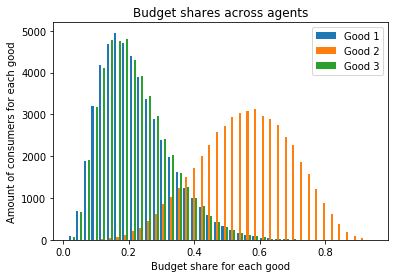

In [122]:
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt. title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

In [123]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

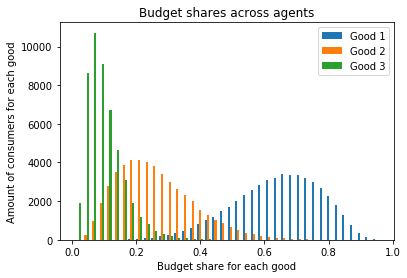

In [124]:
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt. title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

We notice that the budget share across agents depends on the $\mu$-vector due to its role in determining the consumer's valuation of each good. Good 3 has the lowest value for consumers for the given $\mu$-vector and therefore the lowest budget share.

# **Question 2**

In [133]:
# demand functions
def demand_good_1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

def demand_good_2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

# excess demand function 1
def excess_demand_func_1(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(demand_good_1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# excess demand function 2
def excess_demand_func_2(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(demand_good_2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# excess demand function 3
def excess_demand_func_3(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good_3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e3)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3

In [134]:
size = 50

linspace_p1 = np.linspace(1, 10, size)
linspace_p2 = np.linspace(1, 10, size)

grid1_empty = np.empty((size,size))
grid2_empty = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(linspace_p1, linspace_p2) 
for i,p1 in enumerate(linspace_p1):
    for j,p2 in enumerate(linspace_p2):
        grid1_empty[i,j] = excess_demand_func_1(betas, p1 , p2, e1, e2, e3)
        grid2_empty[i,j] = excess_demand_func_2(betas, p1 , p2, e1, e2, e3)

Text(0.5, 0, '$p_2$')

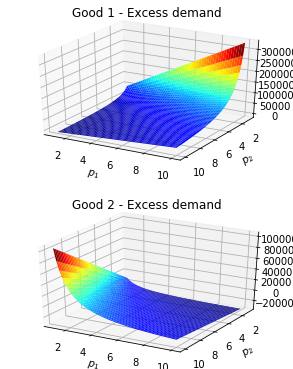

In [162]:
fig = plt.figure(figsize=(5,10))

# Excess demand of good 1 plotted in 3D
axis1 = fig.add_subplot(3,1,1, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, grid1_empty, cmap=plt.cm.jet, cstride=1, rstride=1)


# Visuals for demand 1
axis1.invert_yaxis()
axis1.set_title('Good 1 - Excess demand')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')


#Excess demand of good 2 plotted in 3D
axis2 = fig.add_subplot(3,1,2, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, grid2_empty, cmap=plt.cm.jet, cstride=1, rstride=1)

# Visuals for demand 2
axis2.invert_yaxis()
axis2.set_title('Good 2 - Excess demand')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')

# **Question 3**

The Walras-equilibrium is found by a trial-and-error process, namely a tâtonnement process. Our solution is the price points for goods 1 and 2 when no demand for good 3 is present. <br/> 
We initially set the pricepoints to $p_1=2$ and $p_2=2$ and set our tolerance is set at $\frac{1}{100.000}$. We set t equal to 1 and let it move towards the cap at $25.000$ such that the iteration reaches its goal.

In [182]:
epsilon = 0.000001
kappa = 0.05
p1 = 2
p2 = 2

t=1
cap = 25000

while t < cap:
    ex0_1 = excess_demand_func_1(betas, p1, p2, e1, e2, e3)
    ex0_2 = excess_demand_func_2(betas, p1, p2, e1, e2, e3)
    
    if ex0_1 < epsilon and ex0_2 < epsilon:
        print(f'\nBy iterating 23.432 times, we find that the price of good 1 and 2 in Walras Equilibrium are: p1 = {p1: .3f} and p2 = {p2: .3f} when there exists no excess demand for good 3.')
        p1target = p1
        p2target = p2
        break
    else:
        p1 += kappa*ex0_1/N
        p2 += kappa*ex0_2/N
    
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 23432 or t == 23433:
        print(f'Iteration {t} -> ex0_1:{ex0_1:10.4f} - ex0_2: {ex0_2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 5 -> ex0_1:26560.5053 - ex0_2: -16068.6980 -> p1:     2.1416 - p2:     1.9161
Iteration 10 -> ex0_1:22982.3689 - ex0_2: -14337.7508 -> p1:     2.2633 - p2:     1.8409
Iteration 15 -> ex0_1:20159.1957 - ex0_2: -12690.4051 -> p1:     2.3695 - p2:     1.7742
Iteration 20 -> ex0_1:17879.4868 - ex0_2: -11129.9029 -> p1:     2.4633 - p2:     1.7155
Iteration 25 -> ex0_1:16008.1606 - ex0_2: -9662.2964 -> p1:     2.5469 - p2:     1.6643
Iteration 30 -> ex0_1:14453.5887 - ex0_2: -8294.2288 -> p1:     2.6222 - p2:     1.6201
Iteration 35 -> ex0_1:13150.5245 - ex0_2: -7031.4230 -> p1:     2.6905 - p2:     1.5825
Iteration 40 -> ex0_1:12050.6272 - ex0_2: -5877.7064 -> p1:     2.7529 - p2:     1.5508
Iteration 45 -> ex0_1:11116.9102 - ex0_2: -4834.4943 -> p1:     2.8103 - p2:     1.5246
Iteration 50 -> ex0_1:10320.3432 - ex0_2: -3900.6645 -> p1:     2.8634 - p2:     1.5033
Iteration 500 -> ex0_1: 2262.7241 - ex0_2: 847.8262 -> p1:     4.6939 - p2:     1.9454
Iteration 2500 -> ex0_1:  215.